In [1]:
cd /home/dongdong/SCR/rid_ykt6.run02/iter.000023/00.enhcMD/005-2

/scratch/gpfs/dongdong/rid_ykt6.run02/iter.000023/00.enhcMD/005-2


In [2]:
import numpy as np
data=np.loadtxt('plm.out')

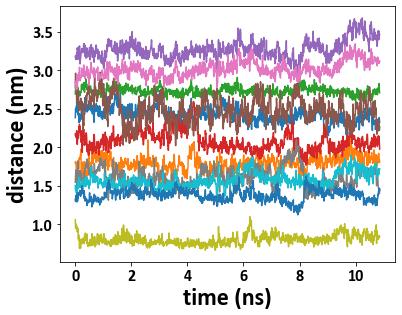

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
fig, ax = plt.subplots(figsize=(6,4.7))
for i in range(1,len(data[0])):
    ax.plot(data[:,0]/1000,data[:,i])
ax.set_ylabel(r'distance (nm)',fontproperties=font_prop)
ax.set_xlabel(r'time (ns)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.show()

In [7]:
data[:,1]

array([2.382792, 2.497605, 2.477077, ..., 2.384121, 2.365866, 2.32356 ])

In [15]:
data0=np.loadtxt('avg_std2')

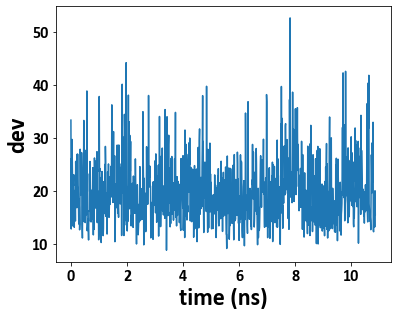

In [16]:
fig, ax = plt.subplots(figsize=(6,4.7))
ax.plot(data[:,0]/1000,data0)
ax.set_ylabel(r'dev',fontproperties=font_prop)
ax.set_xlabel(r'time (ns)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.savefig('dev.png',dpi=300,bbox_inches='tight')
plt.show()

In [17]:
pwd

'/scratch/gpfs/dongdong/rid_ykt6.run02/iter.000023/00.enhcMD/005-2'

In [23]:
def plot_iter(filedir,walkers_index,beg_iter,end_iter):
    alldataset=pd.DataFrame()
    fig, ax = plt.subplots(figsize=(6,6))
    for it in np.arange(int(beg_iter),int(end_iter)+1):
        iteration="%06d" %it
        walkers_ind="%03d" %int(walkers_index)
        filename=filedir+"iter."+str(iteration)+"/00.enhcMD/"+str(walkers_ind)+"/plm.out"
        data = np.loadtxt(filename)
        dataset = pd.DataFrame(data[:,1:])
        dataset['iteration']=[it]*len(data)
        alldataset=alldataset.append(dataset)
    g = sns.pairplot(alldataset,vars=alldataset.columns[:-1], hue="iteration")
    
    #g.set(xlim=(-3.2,3.2),ylim=(-3.2, 3.2))
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    #for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #    label.set_fontproperties(font_prop)
    #    label.set_fontsize(16)
    #plt.savefig(figout,dpi=300,bbox_inches='tight')
    #plt.show()

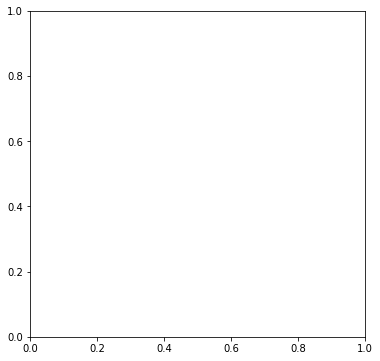

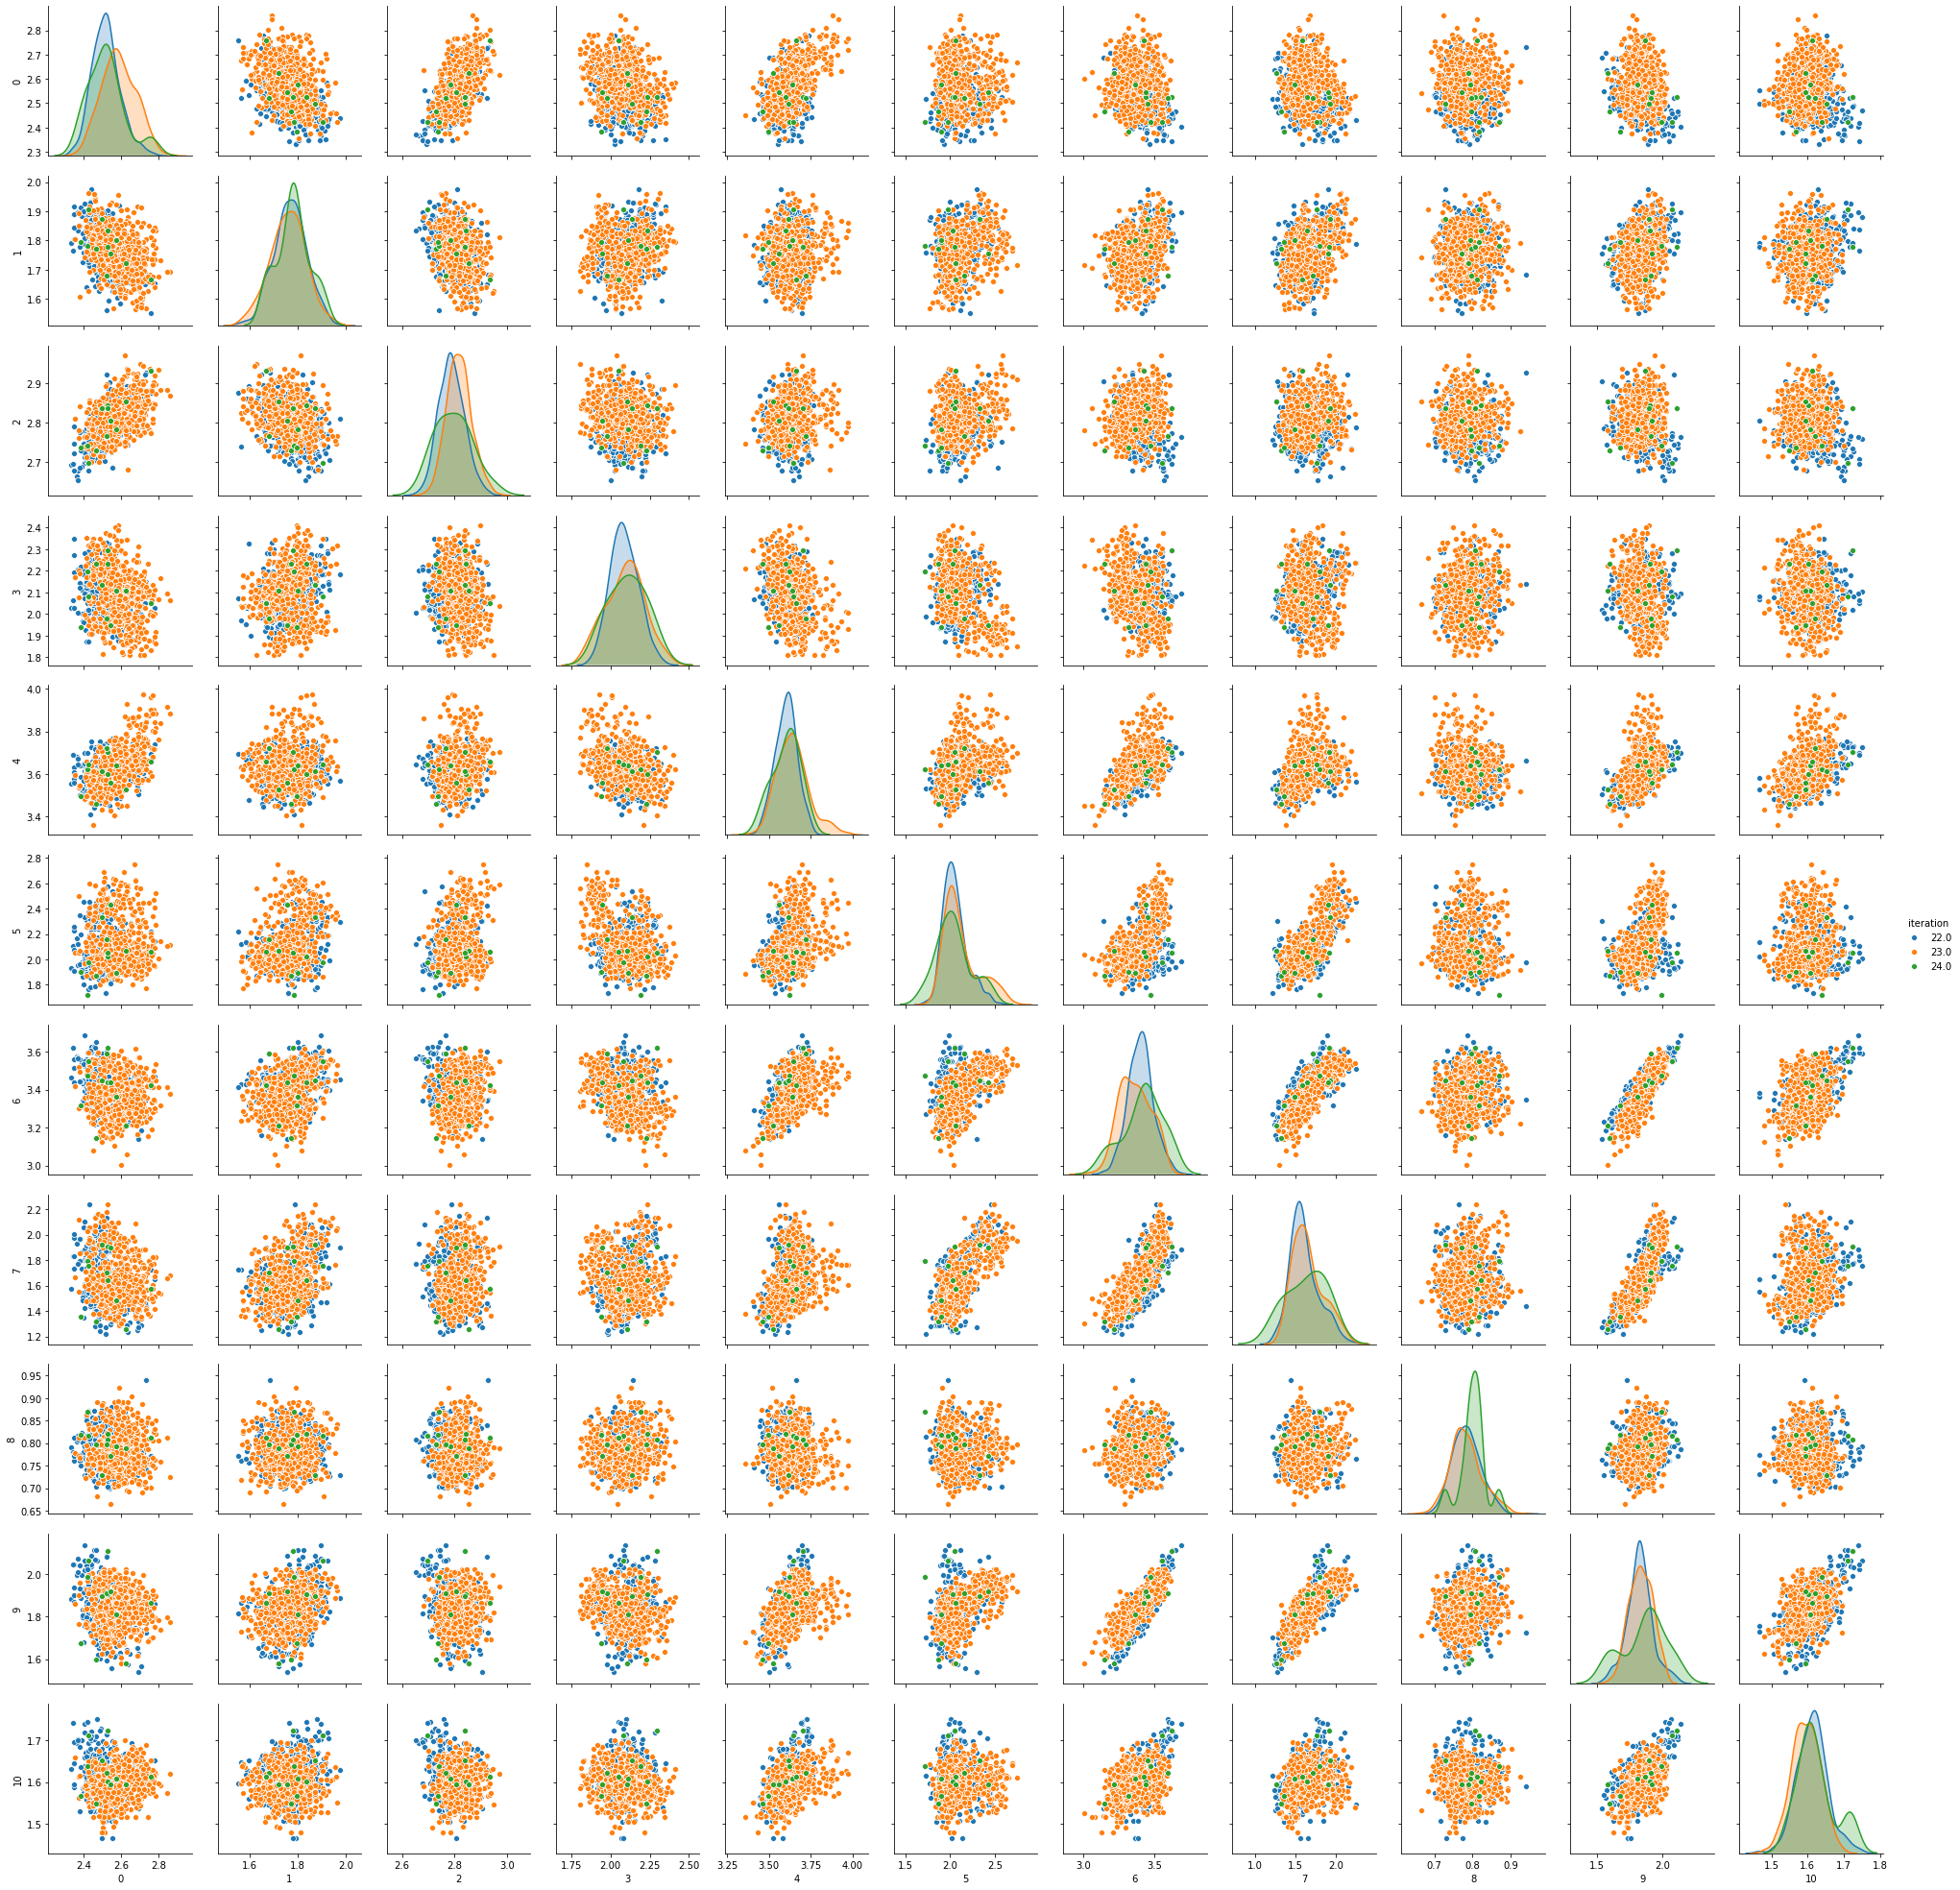

In [25]:
import seaborn as sns
import pandas as pd

plot_iter('/home/dongdong/SCR/rid_ykt6.run02/','0','22','24')


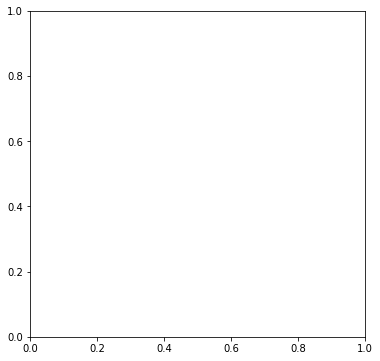

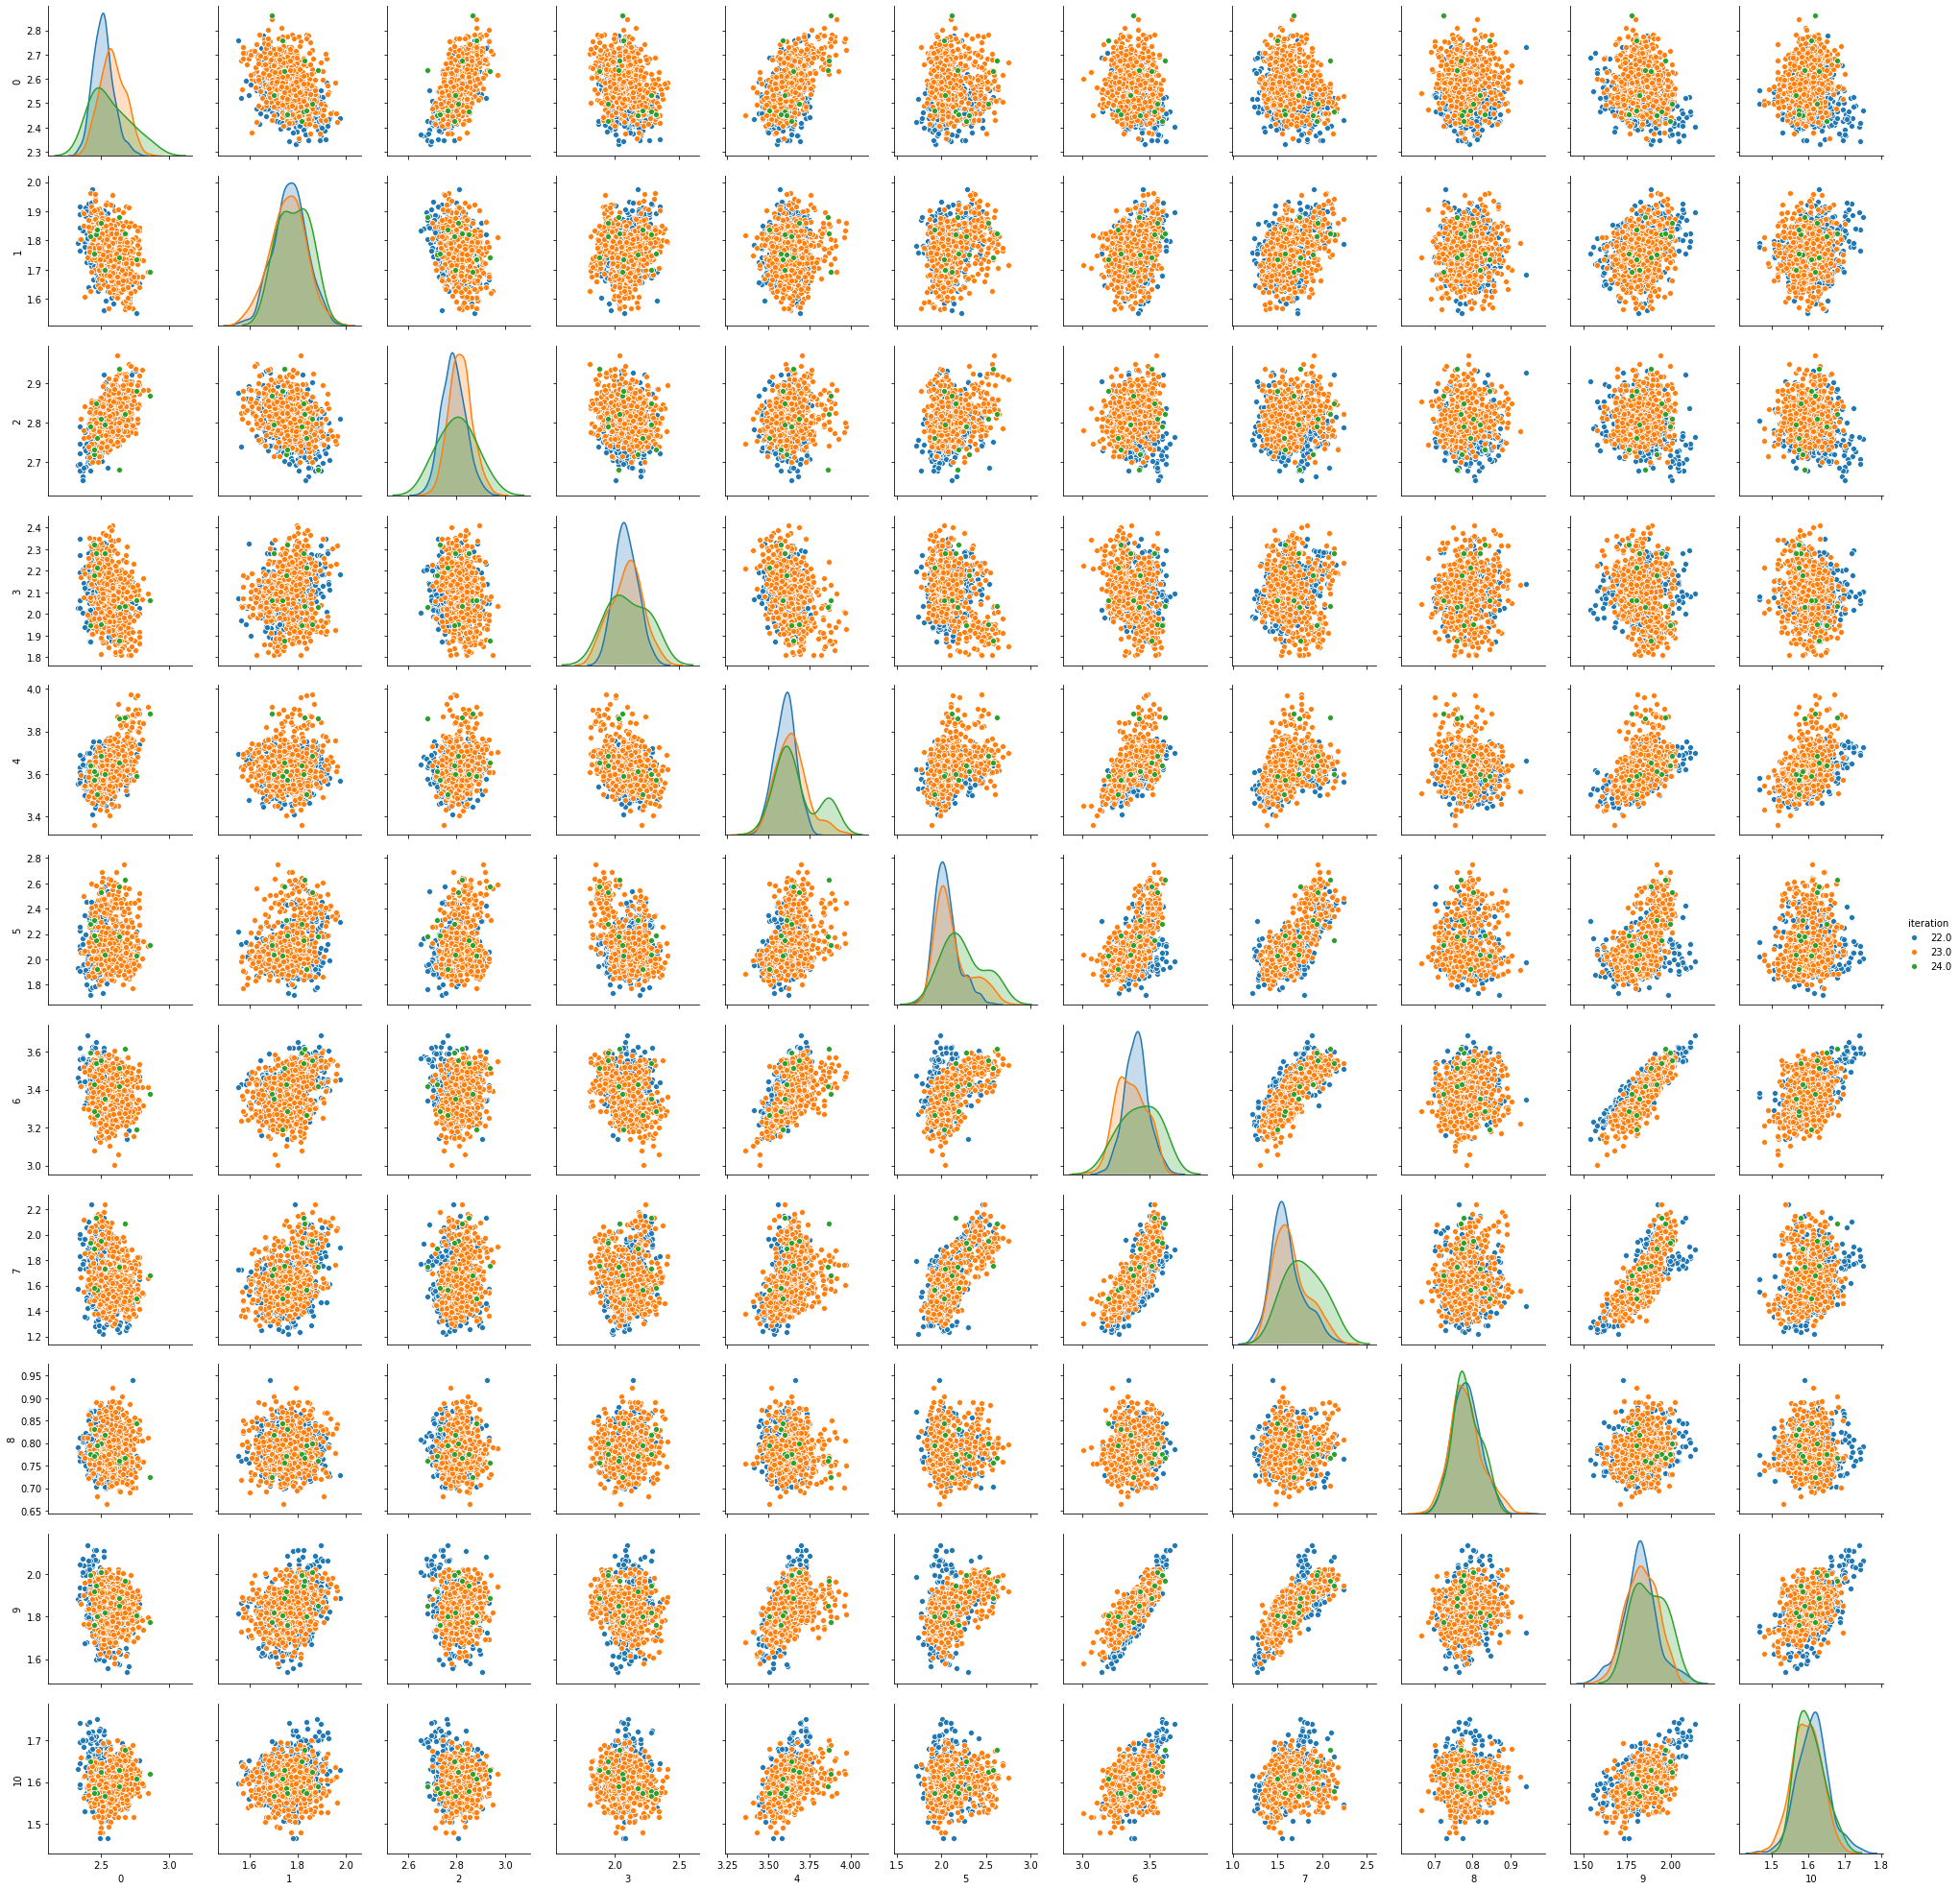

In [26]:
plot_iter('/home/dongdong/SCR/rid_ykt6.run02/','0','22','24')

In [36]:
import os,glob,shutil
import argparse
import numpy as np
import sklearn.cluster as cluster
cv_dih_dim = 0
def cv_dist (a, b) :
    diff = a - b
    angle_pbc_range = len(diff)
    if cv_dih_dim is not None :
        angle_pbc_range = cv_dih_dim
    for ii in range(len(diff)) :
        value = diff[ii]
        if ii < angle_pbc_range :
            if value < -np.pi :
                value += 2 * np.pi
            elif value >= np.pi :
                value -= 2 * np.pi
        diff[ii] = value
    return np.linalg.norm(diff)

def mk_dist (cv) :
    nframe = cv.shape[0]
    dist = np.zeros([nframe, nframe])
    for ii in range(nframe) :
        for jj in range(ii+1, nframe) :
            dist[ii][jj] = cv_dist(cv[ii], cv[jj])
            dist[jj][ii] = dist[ii][jj]
    return dist
def mk_cluster (dist, distance_threshold) :
    cls = cluster.AgglomerativeClustering(n_clusters = None,
                                          linkage='average',
                                          affinity = 'precomputed',
                                          distance_threshold=distance_threshold)
    cls.fit(dist)
    return cls.labels_

def sel_from_cluster (angles, distance_threshold) :
    dist = mk_dist (angles)
    labels = mk_cluster (dist, distance_threshold)
    # make cluster map
    cls_map = []
    for ii in range(len(set(labels))) :
        cls_map.append([])
    for ii in range(len(labels)) :
        cls_idx = labels[ii]
        cls_map[cls_idx].append(ii)
    # randomly select from cluster
    cls_sel = []
    np.random.seed(seed = None)
    for ii in cls_map :
        _ret = np.random.choice(ii, 1)
        cls_sel.append (_ret[0])
    cls_sel.sort()
    return cls_sel


In [344]:
sel_angles=np.loadtxt('/home/dongdong/SCR/trpcage/traj2.dat')

In [345]:
dist = mk_dist (sel_angles[-500:])

In [43]:
all_cl=[]
for wa in range(30):
    print(wa)
    temp_cl=[]
    for it in range(14):
        filename='/home/dongdong/SCR/ykt6.run06/iter.%06d/00.enhcMD/%03d/sel.angle.out' %(it,wa)
        sel_angles=np.loadtxt(filename)
        cls_sel = sel_from_cluster (sel_angles, 0.4)
        #dist=mk_dist(sel_angles)
        #cls_sel = mk_cluster(dist, 2.5)
        temp_cl.append(len(set(cls_sel)))
    np.savetxt('/home/dongdong/SCR/ykt6.run06/w%d_clu0.4.dat' %wa, temp_cl)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


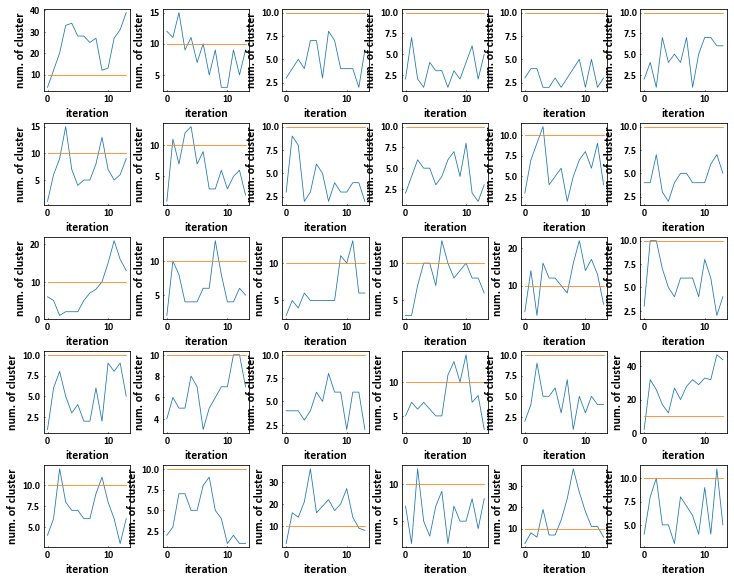

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=12)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
num_walkers=30
fig = plt.figure(figsize=(10,8))
for en in range(num_walkers):
    allcl=np.loadtxt('/home/dongdong/SCR/ykt6.run06/w%d_clu0.4.dat' %en)
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    sub.plot(range(len(allcl)),allcl,lw=0.8)
    sub.plot(range(len(allcl)),[10]*len(allcl),lw=0.8)
    #sub.plot([13]*2,[0,150],lw=0.8)
    sub.set_ylabel(r'num. of cluster',fontproperties=font_prop)
    sub.set_xlabel(r'iteration',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    #plt.ylim(0,150)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

In [49]:
for en in range(30):
    #allcl=np.loadtxt('/home/dongdong/SCR/ykt6.run06/w%d_clu0.4.dat' %en)
    np.savetxt('/home/dongdong/SCR/ykt6.run07/iter.000000/00.enhcMD/%03d/trust_lvl1.dat' %en, [12])

In [353]:
len(set(cls2.labels_))

4

In [279]:
aa=sel_from_cluster (sel_angles[:,1:], 2.4)

In [282]:
new_list = [i for i in aa if i > 200]

In [283]:
new_list

[208,
 213,
 230,
 233,
 242,
 251,
 266,
 283,
 302,
 308,
 343,
 345,
 347,
 375,
 377,
 378,
 379,
 381,
 392,
 406,
 409,
 422,
 428,
 429,
 459,
 500]

In [334]:
test=np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],[1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4],[1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1],[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],[3.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [39]:
test=np.array([2]*11)

In [40]:
cv_dist(test,test+0.2)

0.6633249580710806

In [336]:
cls = cluster.AgglomerativeClustering(n_clusters=None,distance_threshold=2.5)
cls.fit(test)
cls.labels_

array([0, 0, 0, 1, 1, 0])

In [337]:
dist = mk_dist (test)

In [338]:
dist

array([[0.        , 1.32664992, 0.5       , 2.        , 2.5       ,
        0.        ],
       [1.32664992, 0.        , 1.26885775, 2.03960781, 2.45153013,
        1.32664992],
       [0.5       , 1.26885775, 0.        , 2.06155281, 2.54950976,
        0.5       ],
       [2.        , 2.03960781, 2.06155281, 0.        , 0.5       ,
        2.        ],
       [2.5       , 2.45153013, 2.54950976, 0.5       , 0.        ,
        2.5       ],
       [0.        , 1.32664992, 0.5       , 2.        , 2.5       ,
        0.        ]])

In [339]:
cls2 = cluster.AgglomerativeClustering(n_clusters=None,distance_threshold=1,affinity = 'precomputed',linkage='average')
cls2.fit(dist)
cls2.labels_

array([1, 2, 1, 0, 0, 1])

In [199]:
dist

array([[0.        , 2.26402352, 6.5406693 , ..., 4.70103299, 4.49913736,
        4.58453702],
       [2.26402352, 0.        , 6.21957499, ..., 4.59615549, 4.39061674,
        4.7614352 ],
       [6.5406693 , 6.21957499, 0.        , ..., 7.63331428, 7.23353183,
        7.56281524],
       ...,
       [4.70103299, 4.59615549, 7.63331428, ..., 0.        , 1.15784988,
        1.69753799],
       [4.49913736, 4.39061674, 7.23353183, ..., 1.15784988, 0.        ,
        1.64735436],
       [4.58453702, 4.7614352 , 7.56281524, ..., 1.69753799, 1.64735436,
        0.        ]])

In [23]:
def mk_cluster (dist, distance_threshold ):
    cls = cluster.AgglomerativeClustering(n_clusters=None,distance_threshold=distance_threshold)
    cls.fit(dist)
    return cls.labels_

def sel_from_cluster (angles, distance_threshold) :
    labels = mk_cluster (angles, distance_threshold)
    # make cluster map
    cls_map = []
    for ii in range(len(set(labels))) :
        cls_map.append([])
    for ii in range(len(labels)) :
        cls_idx = labels[ii]
        cls_map[cls_idx].append(ii)
    # randomly select from cluster
    cls_sel = []
    np.random.seed(seed = None)
    for ii in cls_map :
        _ret = np.random.choice(ii, 1)
        cls_sel.append (_ret[0])
    cls_sel.sort()
    return cls_sel


In [24]:
all_cl=[]
for wa in range(30):
    print(wa)
    temp_cl=[]
    for it in range(14):
        filename='/home/dongdong/SCR/ykt6.run06/iter.%06d/00.enhcMD/%03d/sel.angle.out' %(it,wa)
        sel_angles=np.loadtxt(filename)
        cls_sel = sel_from_cluster (sel_angles, 0.3)
        #dist=mk_dist(sel_angles)
        #cls_sel = mk_cluster(dist, 2.5)
        temp_cl.append(len(set(cls_sel)))
    np.savetxt('/home/dongdong/SCR/ykt6.run06/w%d_clu2.dat' %wa, temp_cl)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [152]:
sel_angles=np.loadtxt('/home/dongdong/SCR/rid_ykt6.run02/iter.000022/00.enhcMD/000/sel.angle.out')
cls_sel = sel_from_cluster(sel_angles[2:],0.4)

In [153]:
cls_sel

[1, 2, 6, 15, 26, 31, 35, 49, 62, 76, 79, 81, 88, 92, 97, 110, 117, 120, 123]

In [140]:
labels = mk_cluster (sel_angles, distance_threshold)

In [144]:
distance_threshold

0.5

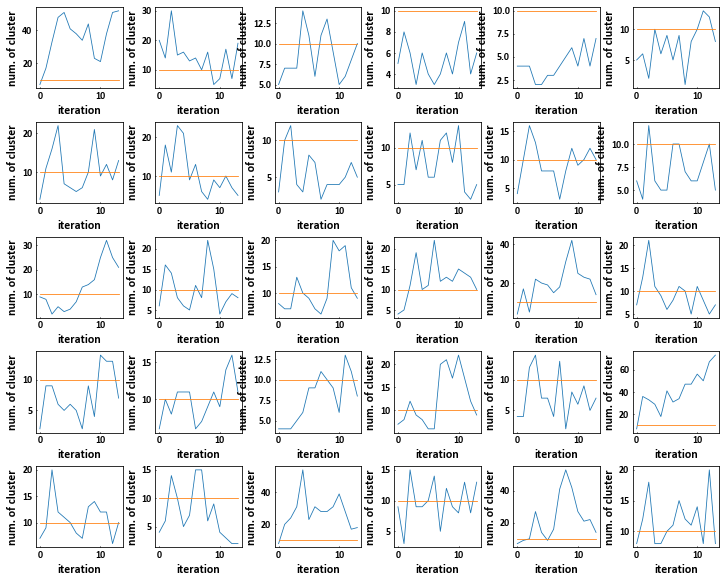

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=12)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
num_walkers=30
fig = plt.figure(figsize=(10,8))
for en in range(num_walkers):
    allcl=np.loadtxt('/home/dongdong/SCR/ykt6.run06/w%d_clu.dat' %en)
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    sub.plot(range(len(allcl)),allcl,lw=0.8)
    sub.plot(range(len(allcl)),[10]*len(allcl),lw=0.8)
    #sub.plot([13]*2,[0,150],lw=0.8)
    sub.set_ylabel(r'num. of cluster',fontproperties=font_prop)
    sub.set_xlabel(r'iteration',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    #plt.ylim(0,150)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

In [155]:
def plot_iter(filedir,walkers_index,beg_iter,end_iter):
    alldataset=pd.DataFrame()
    fig, ax = plt.subplots(figsize=(6,6))
    for it in np.arange(int(beg_iter),int(end_iter)+1):
        iteration="%06d" %it
        walkers_ind="%03d" %int(walkers_index)
        filename=filedir+"/plm.out%d" %it
        data = np.loadtxt(filename)
        dataset = pd.DataFrame(data[:,1:])
        dataset['iteration']=[it]*len(data)
        alldataset=alldataset.append(dataset)
    g = sns.pairplot(alldataset,vars=alldataset.columns[:-1], hue="iteration")

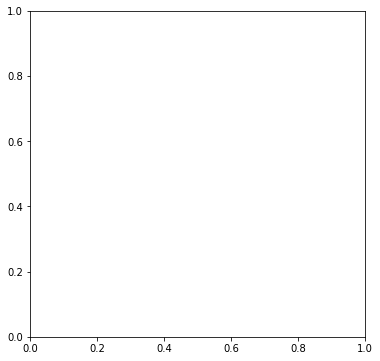

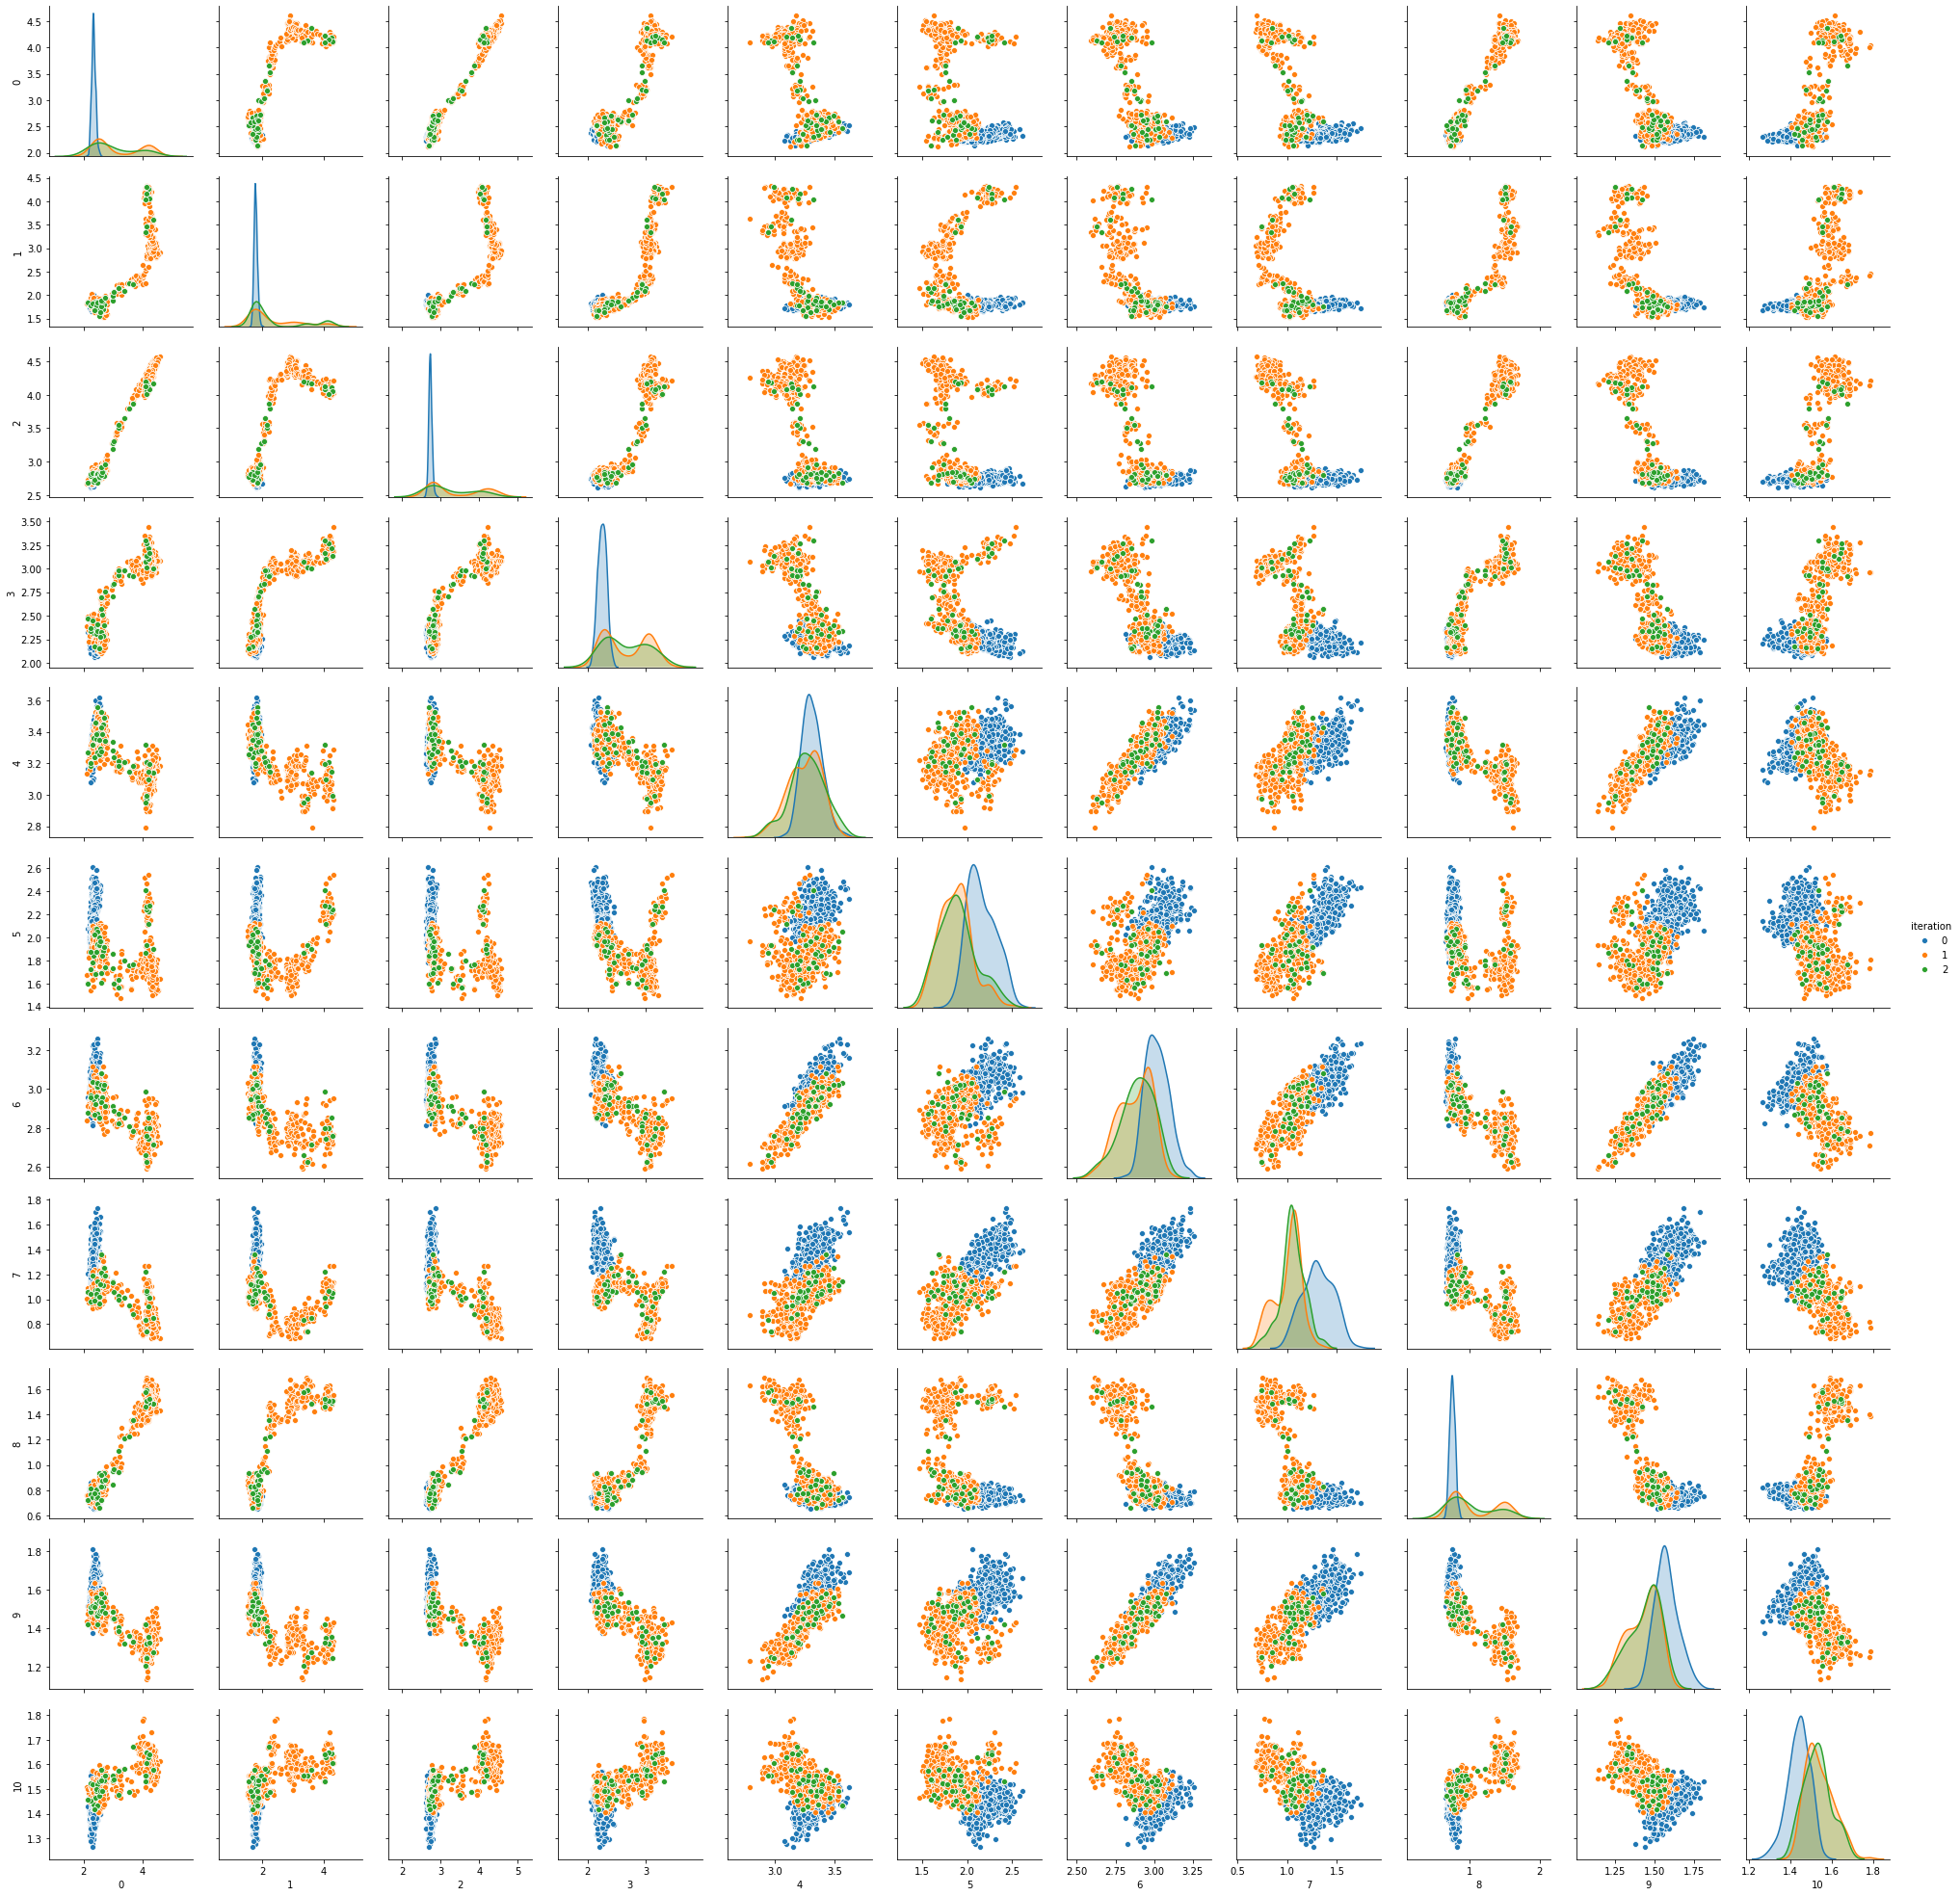

In [157]:
plot_iter('/home/dongdong/SCR/ykt6.run06/test/','0','0','2')

In [285]:
test=np.array([1]*5)

In [288]:
test[-6:]

array([1, 1, 1, 1, 1])

In [284]:
cv_dist(test,test+0.3)

1.8493242008906932

In [172]:
test_d=np.loadtxt('/home/dongdong/SCR/trpcage.run05/iter.000000/00.enhcMD/000/plm.out')

In [173]:
np.std(test_d[:,1:],axis=0)

array([0.76221769, 0.60469351, 1.1028789 , 0.48311177, 1.02047968,
       0.42714349, 0.25360981, 0.37962847, 1.10276139, 0.62326661,
       0.32813418, 0.27776941, 0.20152196, 0.25424978, 0.3469944 ,
       0.5742711 , 0.9370307 , 1.08427044, 1.04290678, 0.56217775,
       2.81325215, 0.1920091 , 0.4659399 , 0.44785251, 0.61882428,
       0.46324902, 0.41473142, 0.21177238, 0.27933657, 0.46243417,
       0.19325269, 0.16531451, 0.98423422, 0.18371457, 0.49058082,
       0.20271648, 0.83011099, 0.60337599])

In [174]:
np.linalg.norm(np.std(test_d[:,1:],axis=0))

4.637679217907466

In [1]:
#!/usr/bin/env python3

import os,glob,shutil
import argparse
import numpy as np
import sklearn.cluster as cluster

cv_dih_dim = 38

def parse_cmd () :
    parser = argparse.ArgumentParser()
    parser.add_argument("-i","--idx-file", type=str, default = 'sel.out',
                        help="The sel idx files")
    parser.add_argument("-c","--cv-file", type=str, default = 'sel.angle.out',
                        help="The sel cv files")
    parser.add_argument("-t","--threshold", type=int, default = 0.3,
                        help="The number of clusters")
    parser.add_argument("--output-idx", type=str, default = 'cls.out',
                        help="The output cv idx")
    parser.add_argument("--output-cv", type=str, default = 'cls.angle.out',
                        help="The output cv value")
    args = parser.parse_args()
    return args

def cv_dist (a, b) :
    diff = a - b
    angle_pbc_range = len(diff)
    if cv_dih_dim is not None :
        angle_pbc_range = cv_dih_dim
    for ii in range(len(diff)) :
        value = diff[ii]
        if ii < angle_pbc_range :
            if value < -np.pi :
                value += 2 * np.pi
            elif value >= np.pi :
                value -= 2 * np.pi
        diff[ii] = value
    return np.linalg.norm(diff)

def mk_dist (cv) :
    nframe = cv.shape[0]
    dist = np.zeros([nframe, nframe])
    for ii in range(nframe) :
        for jj in range(ii+1, nframe) :
            dist[ii][jj] = cv_dist(cv[ii], cv[jj])
            dist[jj][ii] = dist[ii][jj]
    return dist

def mk_cluster (dist, distance_threshold) :
    cls = cluster.AgglomerativeClustering(n_clusters = None, 
                                          linkage='average', 
                                          affinity = 'precomputed',
                                          distance_threshold=distance_threshold)
    cls.fit(dist)
    return cls.labels_

def sel_from_cluster (angles, distance_threshold) :
    dist = mk_dist (angles)
    labels = mk_cluster (dist, distance_threshold)
    # make cluster map
    cls_map = []
    for ii in range(len(set(labels))) :
        cls_map.append([])
    for ii in range(len(labels)) :
        cls_idx = labels[ii]
        cls_map[cls_idx].append(ii)
    # randomly select from cluster
    cls_sel = []
    np.random.seed(seed = None)
    for ii in cls_map :
        _ret = np.random.choice(ii, 1)
        cls_sel.append (_ret[0])    
    cls_sel.sort()
    return cls_sel

def _main () :
    args = parse_cmd ()
    angidx = np.loadtxt (args.idx_file)
    angles = np.loadtxt (args.cv_file)    
    ncluster = args.numb_cls

    cls_sel = sel_from_cluster(angles, distance_threshold)
    
    np.savetxt(args.output_idx, angidx[cls_sel], fmt = '%d')
    np.savetxt(args.output_cv,  angles[cls_sel], fmt = '%.6f')



27


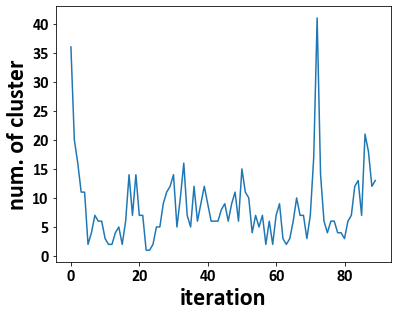

28


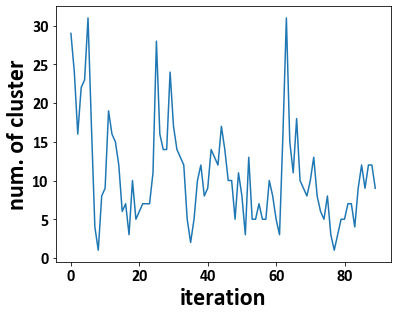

29


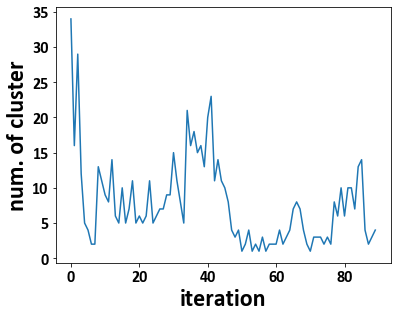

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
all_cl=[]
for wa in range(27,30):
    print(wa)
    temp_cl=[]
    for it in range(90):
        filename='/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run02/iter.%06d/00.enhcMD/%03d/sel.angle.out' %(it,wa)
        sel_angles=np.loadtxt(filename)
        cls_sel = sel_from_cluster (sel_angles, 3)
        temp_cl.append(len(set(cls_sel)))
    np.savetxt('/home/dongdong/SCR/trpcage/analysis/run02/cluster2/w%d_clu.dat' %wa, temp_cl)
    fig, ax = plt.subplots(figsize=(6,4.7))
    ax.plot(range(len(temp_cl)),temp_cl)
    ax.set_ylabel(r'num. of cluster',fontproperties=font_prop)
    ax.set_xlabel(r'iteration',fontproperties=font_prop)
    #plt.ylim(0,2)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig('/home/dongdong/SCR/trpcage/analysis/run02/cluster2/w%d_clu.png' %wa,dpi=300,bbox_inches='tight')
    plt.show()

AttributeError: 'Figure' object has no attribute 'set_ylabel'

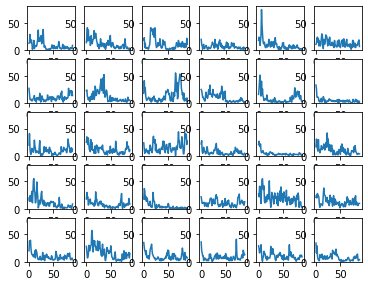

In [11]:
fig = plt.figure(figsize=(6,4.7))
for i in range(30):
    data=np.loadtxt('/home/dongdong/SCR/trpcage/analysis/run02/cluster2/w%d_clu.dat' %i)
    plt.subplot(5, 6, i+1)
    plt.plot(range(len(data)),data)
    plt.ylim(0,80)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    #for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #    label.set_fontproperties(font_prop)
    #    label.set_fontsize(16)
plt.set_ylabel(r'num. of cluster',fontproperties=font_prop)
plt.set_xlabel(r'iteration',fontproperties=font_prop)
plt.savefig('/home/dongdong/SCR/trpcage/analysis/run02/cluster2/all.png' %wa,dpi=300,bbox_inches='tight')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabel'

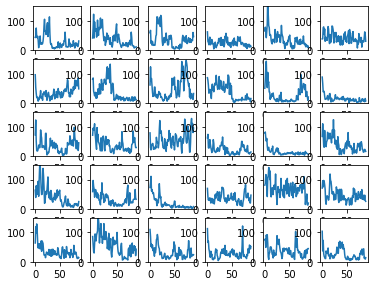

In [13]:
fig = plt.figure(figsize=(6,4.7))
for i in range(30):
    data=np.loadtxt('/home/dongdong/SCR/trpcage/analysis/run02/cluster/w%d_clu.dat' %i)
    plt.subplot(5, 6, i+1)
    plt.plot(range(len(data)),data)
    plt.ylim(0,150)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    #for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #    label.set_fontproperties(font_prop)
    #    label.set_fontsize(16)
plt.set_ylabel(r'num. of cluster',fontproperties=font_prop)
plt.set_xlabel(r'iteration',fontproperties=font_prop)
plt.savefig('/home/dongdong/SCR/trpcage/analysis/run02/cluster/all.png' %wa,dpi=300,bbox_inches='tight')
plt.show()